## 匯入資料

In [50]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("E:/data/kc_house_data.csv")
print(df.head())

           id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      19

## 檢查資料

In [51]:
print(df.isnull().values.sum())
print("資料筆數:", df.shape)
print("資料的欄位名稱，分別是:", df.keys())
print("第一筆的資料內容:", df.iloc[0,::])
print("第一筆的預測目標:",df['price'][0])

0
資料筆數: (21597, 21)
資料的欄位名稱，分別是: Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')
第一筆的資料內容: id               7129300520
date             10/13/2014
price                221900
bedrooms                  3
bathrooms                 1
sqft_living            1180
sqft_lot               5650
floors                    1
waterfront                0
view                      0
condition                 3
grade                     7
sqft_above             1180
sqft_basement             0
yr_built               1955
yr_renovated              0
zipcode               98178
lat                 47.5112
long               -122.257
sqft_living15          1340
sqft_lot15             5650
Name: 0, dtype: object
第一筆的預測目標: 221900.0


<ipython-input-52-058a00c8dafe>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.age = 2021 - df.yr_built


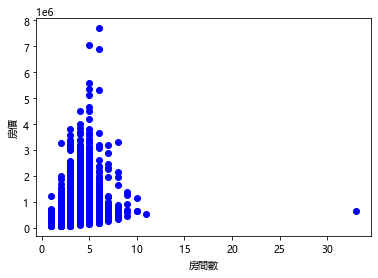

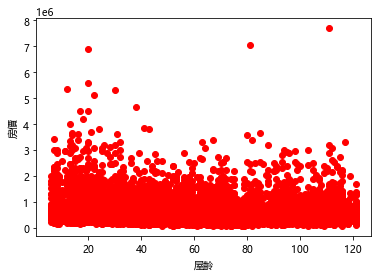

In [52]:
df.age = 2021 - df.yr_built
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei'] 
plt.scatter(df.bedrooms, df.price,  color='blue')
plt.xlabel("房間數")
plt.ylabel("房價")
plt.show()
plt.scatter(df.age, df.price,  color='red')
plt.xlabel("屋齡")
plt.ylabel("房價")
plt.show()

## 整理資料

In [53]:
X = df.drop(['price','id','date','yr_built','zipcode','lat','long'],axis=1)
y = df['price']/10000
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
print("原始資料集的維度大小:", df.shape)
print("訓練集的維度大小:   ", train_X.shape)
print("測試集的維度大小:   ", test_X.shape)

原始資料集的維度大小: (21597, 21)
訓練集的維度大小:    (17277, 14)
測試集的維度大小:    (4320, 14)


## 建立與訓練模型

In [54]:
model = LinearRegression()  #使用線性回歸模型
model.fit(train_X, train_y)  #使用訓練資料train_X與train_y訓練模組
print ('係數: ', model.coef_)
print ('截距: ',model.intercept_)

係數:  [-3.78781857e+00 -1.52864509e+00  1.32665058e-02 -6.70149400e-07
  3.31320065e-02  5.60464239e+01  5.59216385e+00  6.02040596e+00
  1.03865655e+01  4.93186184e-03  8.33464398e-03  7.30975626e-03
  1.78478257e-03 -8.14708424e-05]
截距:  -73.70388037004294


## 模型預測

In [55]:
pred = model.predict(test_X) #將test_X輸入模型進行預測，儲存到pred
score = mean_squared_error(pred, test_y)  #比較模型預測結果pred與實際結果test_y的MSE
print("MSE:", score)

MSE: 522.1628411374705


## 使用房間數進行線性迴歸

In [56]:
train_X_RM = train_X.loc[:, ['bedrooms']] 
test_X_RM  = test_X.loc[ :, ['bedrooms']] 
model2 = LinearRegression()   
model2.fit(train_X_RM, train_y)
print("訓練集的維度大小:   ", train_X_RM.shape)
print("測試集的維度大小:   ", test_X_RM.shape)
print ('係數: ', model2.coef_)
print ('截距: ',model2.intercept_)
pred = model2.predict(test_X_RM)
score = mean_squared_error(pred, test_y)
print("MSE:", score)

訓練集的維度大小:    (17277, 1)
測試集的維度大小:    (4320, 1)
係數:  [12.86822909]
截距:  10.723024284123177
MSE: 1202.5261806707208
